In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# 正常显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示符号
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False



In [2]:
os.chdir('C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques')
data=pd.read_csv('train.csv')


In [3]:
data['MSSubClass']=data['MSSubClass'].astype(str)  #MSSubClass是一个分类变量，所以要把他的数据类型改为‘’str‘’
Id=data.loc[:,'Id']   #ID先提取出来，后面合并表格要用
data=data.drop('Id',axis=1)

x=data.loc[:,data.columns!='SalePrice']
y=data.loc[:,'SalePrice']   
mean_cols=x.mean()
x=x.fillna(mean_cols)  #填充缺失值
x_dum=pd.get_dummies(x)    #独热编码
x_train,x_test,y_train,y_test = train_test_split(x_dum,y,test_size = 0.3,random_state = 1)

#再整理出一组标准化的数据，通过对比可以看出模型的效果有没有提高
x_dum=pd.get_dummies(x)
scale_x=StandardScaler()
x1=scale_x.fit_transform(x_dum)
scale_y=StandardScaler()
y=np.array(y).reshape(-1,1)
y1=scale_y.fit_transform(y)
y1=y1.ravel()
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.3,random_state = 1)



In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor




In [8]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']
score_=[]



In [9]:
for name,model in zip(models_str,models):
    print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)  
    score=model.score(x_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))


开始训练模型：LinearRegression
LinearRegression 得分:0.8617862569556008
开始训练模型：KNNRegressor
KNNRegressor 得分:0.6349265591296906
开始训练模型：SVR
SVR 得分:-0.03770551856874049
开始训练模型：Ridge
Ridge 得分:0.874995734267244
开始训练模型：Lasso
Lasso 得分:0.8745549798771067
开始训练模型：MLPRegressor
MLPRegressor 得分:0.5725241312278226
开始训练模型：DecisionTree
DecisionTree 得分:0.6948363091501704
开始训练模型：ExtraTree
ExtraTree 得分:0.7377523294849916
开始训练模型：RandomForest
RandomForest 得分:0.8997746286299076
开始训练模型：AdaBoost
AdaBoost 得分:0.8444184411617536
开始训练模型：GradientBoost
GradientBoost 得分:0.9133503199724958
开始训练模型：Bagging
Bagging 得分:0.9095310463260666


In [10]:
y_log=np.log(y)
x_train,x_test,y_train_log,y_test_log = train_test_split(x_dum,y_log,test_size = 0.3,random_state = 1)


In [11]:
for name,model in zip(models_str,models):
    print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)  
    score=model.score(x_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))


开始训练模型：LinearRegression
LinearRegression 得分:0.8617862569556008
开始训练模型：KNNRegressor
KNNRegressor 得分:0.6349265591296906
开始训练模型：SVR
SVR 得分:-0.03770551856874049
开始训练模型：Ridge
Ridge 得分:0.874995734267244
开始训练模型：Lasso
Lasso 得分:0.8745549798771067
开始训练模型：MLPRegressor
MLPRegressor 得分:0.631027472156046
开始训练模型：DecisionTree
DecisionTree 得分:0.8230178672150155
开始训练模型：ExtraTree
ExtraTree 得分:0.7464065665377217
开始训练模型：RandomForest
RandomForest 得分:0.8999755801622865
开始训练模型：AdaBoost
AdaBoost 得分:0.8401899654496833
开始训练模型：GradientBoost
GradientBoost 得分:0.9182426549817959
开始训练模型：Bagging
Bagging 得分:0.8861636817458185


# 标准化

In [13]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']
score_1=[]
for name,model in zip(models_str,models):
    print('开始训练模型：'+name)
    model=model
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    score=model.score(x_test1,y_test1)
    score_1.append(str(score)[:5])
    print(name +' 得分:'+str(score))


开始训练模型：LinearRegression
LinearRegression 得分:-2.190532294206726e+20
开始训练模型：KNNRegressor
KNNRegressor 得分:0.7173346620628371
开始训练模型：SVR
SVR 得分:0.7410716690153423
开始训练模型：Ridge
Ridge 得分:0.8689275376724439
开始训练模型：Lasso
Lasso 得分:-0.00041647622797813533
开始训练模型：MLPRegressor
MLPRegressor 得分:0.8547557772619298
开始训练模型：DecisionTree
DecisionTree 得分:0.7432527524561217
开始训练模型：ExtraTree
ExtraTree 得分:0.7139030586937467
开始训练模型：RandomForest
RandomForest 得分:0.8933608088682427
开始训练模型：AdaBoost
AdaBoost 得分:0.81055410681103
开始训练模型：GradientBoost
GradientBoost 得分:0.9211991812481339
开始训练模型：Bagging
Bagging 得分:0.86750756798308


In [14]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']
score_adapt=[]
for name,model in zip(models_str,models):
    if name in ['LinearRegression','Ridge','ExtraTree']:   
        print('开始训练模型：'+name+' 平滑处理')
        model=model
        model.fit(x_train,y_train_log)
        y_pred=model.predict(x_test)     
        score=model.score(x_test,y_test_log)
        score_adapt.append(str(score)[:5])
        print(name +' 得分:'+str(score))
        
    elif name in ['SVR','MLPRegressor','Bagging','AdaBoost','KNNRegressor']:
        print('开始训练模型：'+name+' 标准化处理')
        model=model
        model.fit(x_train1,y_train1)
        y_pred=model.predict(x_test1)
        ypred_original=scale_y.inverse_transform(y_pred)
        score=model.score(x_test1,y_test1)
        score_adapt.append(str(score)[:5])       
        print(name +' 得分:'+str(score))
        
    else:
        print('开始训练模型：'+name+' 普通')
        model=model
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        ypred_original=scale_y.inverse_transform(y_pred)
        score=model.score(x_test,y_test)
        score_adapt.append(str(score)[:5])       
        print(name +' 得分:'+str(score))


开始训练模型：LinearRegression 平滑处理
LinearRegression 得分:0.8899808420810953
开始训练模型：KNNRegressor 标准化处理
KNNRegressor 得分:0.7173346620628371
开始训练模型：SVR 标准化处理
SVR 得分:0.7410716690153423
开始训练模型：Ridge 平滑处理
Ridge 得分:0.8911834458339539
开始训练模型：Lasso 普通
Lasso 得分:0.8745549798771067
开始训练模型：MLPRegressor 标准化处理
MLPRegressor 得分:0.8571992970856925
开始训练模型：DecisionTree 普通
DecisionTree 得分:0.7380241173468204
开始训练模型：ExtraTree 平滑处理
ExtraTree 得分:0.7063090566146948
开始训练模型：RandomForest 普通
RandomForest 得分:0.9034012078127875
开始训练模型：AdaBoost 标准化处理
AdaBoost 得分:0.8356095655568297
开始训练模型：GradientBoost 普通
GradientBoost 得分:0.913051065386047
开始训练模型：Bagging 标准化处理
Bagging 得分:0.879846753420893


In [17]:
score_x=[]
for name,model in zip(models_str,models):
    if name in ['MLPRegressor','AdaBoost','Bagging','ExtraTree']:
        print('开始训练模型：'+name+' 标准化处理')
        model=model
        model.fit(x_train1,y_train1)
        y_pred=model.predict(x_test1)
        ypred_original=scale_y.inverse_transform(y_pred)
        score=model.score(x_test1,y_test1)
        score_x.append(str(score)[:5])       
        print(name +' 得分:'+str(score))
    elif name in['SVR','KNNRegressor']:
        print('开始训练模型：'+name+' 分开标准化处理')
        model=model
        model.fit(x_train1,y_train1)
        y_pred=model.predict(x_test1)
        ypred_original=scale_y.inverse_transform(y_pred)
        score=model.score(x_test1,y_test1)
        score_x.append(str(score)[:5])       
        print(name +' 得分:'+str(score))

    elif name in ['LinearRegression','Ridge']:
        
        print('开始训练模型：'+name+' 平滑处理')
        model=model
        model.fit(x_train,y_train_log)
        y_pred=model.predict(x_test)     
        score=model.score(x_test,y_test_log)
        score_x.append(str(score)[:5])
        print(name +' 得分:'+str(score))

    else:
        print('开始训练模型：'+name+' 普通')
        model=model
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        ypred_original=scale_y.inverse_transform(y_pred)
        score=model.score(x_test,y_test)
        score_x.append(str(score)[:5])       
        print(name +' 得分:'+str(score))


开始训练模型：LinearRegression 平滑处理
LinearRegression 得分:0.8899808420810953
开始训练模型：KNNRegressor 分开标准化处理
KNNRegressor 得分:0.7173346620628371
开始训练模型：SVR 分开标准化处理
SVR 得分:0.7410716690153423
开始训练模型：Ridge 平滑处理
Ridge 得分:0.8911834458339539
开始训练模型：Lasso 普通
Lasso 得分:0.8745549798771067
开始训练模型：MLPRegressor 标准化处理
MLPRegressor 得分:0.8629297349384186
开始训练模型：DecisionTree 普通
DecisionTree 得分:0.7656757642489574
开始训练模型：ExtraTree 标准化处理
ExtraTree 得分:0.661822394054367
开始训练模型：RandomForest 普通
RandomForest 得分:0.8994168344027466
开始训练模型：AdaBoost 标准化处理
AdaBoost 得分:0.8423186387940538
开始训练模型：GradientBoost 普通
GradientBoost 得分:0.9146033132124927
开始训练模型：Bagging 标准化处理
Bagging 得分:0.8895232675020142


In [26]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [20]:
df_train = pd.read_csv('C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques/train.csv')


In [21]:
train = pd.read_csv('C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/GSS-fearless/Desktop/HW2/house-prices-advanced-regression-techniques/test.csv')

#看看数据多大的
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#ID先留着，暂时不用
train_ID = train['Id']
test_ID = test['Id']

#去掉ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)



The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


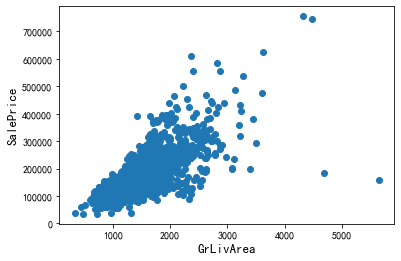

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


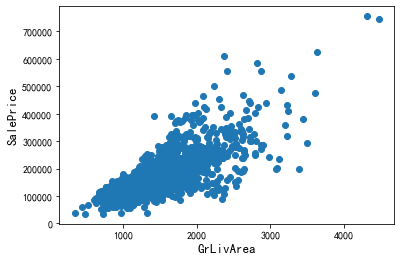

In [23]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [24]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


In [25]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


In [28]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [29]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [30]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [32]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


In [33]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [35]:
averaged_models = AveragingModels(models = (ENet, GBoost,lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Averaged base models score: nan (nan)

